In [ ]:
!pip install Padding

!pip install Crypto

  Preparing metadata (setup.py) ... done
  Created wheel for Padding: filename=Padding-0.5-py3-none-any.whl size=5123 sha256=5a50844b6635cb01a6928186e0402a69568d5b534f6df6957f5f87332a7a9fbc
  Stored in directory: /root/.cache/pip/wheels/9f/63/92/4165a35e075ce9ea29487593f1dfae756c8b997ff0cd3eacd9
Successfully built Padding
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.PublicKey import RSA
from Crypto.Signature.pkcs1_15 import PKCS115_SigScheme
from Crypto.Hash import SHA256
from timeit import default_timer as timer
import Padding
import json
import os

def AesEncrypt(plaintext, key, mode, iv = None):
    start_time = timer()
    plaintext = Padding.appendPadding(plaintext, blocksize=Padding.AES_blocksize, mode=0)
    if iv == None: cipher = AES.new(key, mode)
    else: cipher = AES.new(key, mode, iv)
    ciphertext = cipher.encrypt(plaintext.encode())

    return ciphertext, timer() - start_time

def AesDecrypt(ciphertext, key, mode, iv = None):
    start_time = timer()
    if iv == None: cipher = AES.new(key, mode)
    else: cipher = AES.new(key, mode, iv)
    plaintext = cipher.decrypt(ciphertext)
    plaintext = Padding.removePadding(plaintext.decode(), mode=0)

    return plaintext, timer() - start_time

def RsaEncrypt(plaintext, public_key):
    start_time = timer()
    cipher = PKCS1_OAEP.new(public_key)
    ciphertext = cipher.encrypt(plaintext.encode())

    return ciphertext, timer() - start_time

def RsaDecrypt(ciphertext, private_key):
    start_time = timer()
    cipher = PKCS1_OAEP.new(private_key)
    plaintext = cipher.decrypt(ciphertext)
    plaintext = plaintext.decode()

    return plaintext, timer() - start_time

def Get_digest(file_path):
    hashing = SHA256.new()

    with open(file_path, 'rb') as file:
        while True:
            chunk = file.read(hashing.block_size)
            if not chunk:
                break
            hashing.update(chunk)

    return hashing

data = {}

while(True):
    print('''\nWhat do you want to do? Type the associated number to do so.
    1. AES encryption/decryption
    2. RSA encryption/decryption
    3. RSA Signature
    4. SHA-256 hashing
    5. Exit''')

    i = 0

    while(True):
        try:
            i = int(input())
            if i >= 1 and i <= 5: break
            else: raise Exception
        except:
            print("Wrong input. Type again.")

    if i == 5:
        print("Exiting...")
        break

    try:
        file = open("data.txt", "r")
        file.close()
    except:
        file = open("data.txt", "x")
        file.close()

    if i == 1:
        m = 0

        print('''\nWhat is your preferred mode? Type the associated number to select.
        1. ECB 128 bits
        2. ECB 256 bits
        3. CFB 128 bits
        4. CFB 256 bits''')

        while(True):
            try:
                m = int(input())
                if m >= 1 and m <= 4: break
                else: raise Exception
            except:
                print("Wrong input. Type again.")

        if m == 1:
            mode = AES.MODE_ECB
            key = "0"

            with open('data.txt') as input_file:
                try:
                    data = json.load(input_file)
                    key = data['ecb_128']['key'].encode('ISO-8859-1')
                    print("Found a saved key in the file. The key is: " + str(key))
                except:
                    print("There is no saved key in the file for this mode. Generating a key...")

                    key = os.urandom(16)

                    print("The generated key is: " + str(key))

                    if 'ecb_128' not in data: data['ecb_128'] = {}

                    data['ecb_128']['key'] = key.decode('ISO-8859-1')

                    with open('data.txt', 'w') as output_file:
                        json.dump(data, output_file)

            d = 0

            print('''\nWhat do you want to do? Type the associated number to do so.
            1. Encryption
            2. Decryption''')

            while(True):
                try:
                    d = int(input())
                    if d >= 1 and d <= 2: break
                    else: raise Exception
                except:
                    print("Wrong input. Type again.")

            if d == 1:
                plaintext = input("Type the text to be encrypted: ")

                ciphertext, exec_time = AesEncrypt(plaintext, key, mode)

                print("The encrypted text is: " + str(ciphertext))
                print("Encrypted in " + str(exec_time) + " seconds")

                if 'ecb_128' not in data: data['ecb_128'] = {}

                data['ecb_128']['ciphertext'] = ciphertext.decode('ISO-8859-1')

                with open('data.txt', 'w') as output_file:
                    json.dump(data, output_file)

            elif d == 2:
                with open('data.txt') as input_file:
                    try:
                        data = json.load(input_file)
                        ciphertext = data['ecb_128']['ciphertext'].encode('ISO-8859-1')
                        plaintext, exec_time = AesDecrypt(ciphertext, key, mode)
                        print("Found an encrypted text in the file. The text is: " + str(ciphertext))
                        print("The decrypted text is: " + str(plaintext))
                        print("Decrypted in " + str(exec_time) + " seconds")
                    except:
                        print("There is no saved ciphertext in the file for this mode. Exiting...")

        elif m == 2:
            mode = AES.MODE_ECB
            key = "0"

            with open('data.txt') as input_file:
                try:
                    data = json.load(input_file)
                    key = data['ecb_256']['key'].encode('ISO-8859-1')
                    print("Found a saved key in the file. The key is: " + str(key))
                except:
                    print("There is no saved key in the file for this mode. Generating a key...")

                    key = os.urandom(32)

                    print("The generated key is: " + str(key))

                    if 'ecb_256' not in data: data['ecb_256'] = {}

                    data['ecb_256']['key'] = key.decode('ISO-8859-1')

                    with open('data.txt', 'w') as output_file:
                        json.dump(data, output_file)

            d = 0

            print('''\nWhat do you want to do? Type the associated number to do so.
            1. Encryption
            2. Decryption''')

            while(True):
                try:
                    d = int(input())
                    if d >= 1 and d <= 2: break
                    else: raise Exception
                except:
                    print("Wrong input. Type again.")

            if d == 1:
                plaintext = input("Type the text to be encrypted: ")

                ciphertext, exec_time = AesEncrypt(plaintext, key, mode)

                print("The encrypted text is: " + str(ciphertext))
                print("Encrypted in " + str(exec_time) + " seconds")

                if 'ecb_256' not in data: data['ecb_256'] = {}

                data['ecb_256']['ciphertext'] = ciphertext.decode('ISO-8859-1')

                with open('data.txt', 'w') as output_file:
                    json.dump(data, output_file)

            elif d == 2:
                with open('data.txt') as input_file:
                    try:
                        file_data = json.load(input_file)
                        ciphertext = file_data['ecb_256']['ciphertext'].encode('ISO-8859-1')
                        plaintext, exec_time = AesDecrypt(ciphertext, key, mode)
                        print("Found an encrypted text in the file. The text is: " + str(ciphertext))
                        print("The decrypted text is: " + str(plaintext))
                        print("Decrypted in " + str(exec_time) + " seconds")
                    except:
                        print("There is no saved ciphertext in the file for this mode. Exiting...")

        elif m == 3:
            mode = AES.MODE_CFB
            key = "0"

            with open('data.txt') as input_file:
                try:
                    data = json.load(input_file)
                    key = data['cfb_128']['key'].encode('ISO-8859-1')
                    print("Found a saved key in the file. The key is: " + str(key))
                except:
                    print("There is no saved key in the file for this mode. Generating a key...")

                    key = os.urandom(16)

                    print("The generated key is: " + str(key))

                    if 'cfb_128' not in data: data['cfb_128'] = {}

                    data['cfb_128']['key'] = key.decode('ISO-8859-1')

                    with open('data.txt', 'w') as output_file:
                        json.dump(data, output_file)

            d = 0

            print('''\nWhat do you want to do? Type the associated number to do so.
            1. Encryption
            2. Decryption''')

            while(True):
                try:
                    d = int(input())
                    if d >= 1 and d <= 2: break
                    else: raise Exception
                except:
                    print("Wrong input. Type again.")

            if d == 1:
                plaintext = input("Type the text to be encrypted: ")

                iv = os.urandom(AES.block_size)

                ciphertext, exec_time = AesEncrypt(plaintext, key, mode, iv)

                print("The encrypted text is: " + str(ciphertext))
                print("Encrypted in " + str(exec_time) + " seconds")

                if 'cfb_128' not in data: data['cfb_128'] = {}

                data['cfb_128']['ciphertext'] = ciphertext.decode('ISO-8859-1')
                data['cfb_128']['iv'] = iv.decode('ISO-8859-1')

                with open('data.txt', 'w') as output_file:
                    json.dump(data, output_file)

            elif d == 2:
                with open('data.txt') as input_file:
                    try:
                        data = json.load(input_file)
                        ciphertext = data['cfb_128']['ciphertext'].encode('ISO-8859-1')
                        iv = data['cfb_128']['iv'].encode('ISO-8859-1')
                        plaintext, exec_time = AesDecrypt(ciphertext, key, mode, iv)
                        print("Found an encrypted text in the file. The text is: " + str(ciphertext))
                        print("The decrypted text is: " + str(plaintext))
                        print("Decrypted in " + str(exec_time) + " seconds")
                    except:
                        print("There is no saved ciphertext in the file for this mode. Exiting...")

        elif m == 4:
            mode = AES.MODE_CFB
            key = "0"

            with open('data.txt') as input_file:
                try:
                    data = json.load(input_file)
                    key = data['cfb_256']['key'].encode('ISO-8859-1')
                    print("Found a saved key in the file. The key is: " + str(key))
                except:
                    print("There is no saved key in the file for this mode. Generating a key...")

                    key = os.urandom(32)

                    print("The generated key is: " + str(key))

                    if 'cfb_256' not in data: data['cfb_256'] = {}

                    data['cfb_256']['key'] = key.decode('ISO-8859-1')

                    with open('data.txt', 'w') as output_file:
                        json.dump(data, output_file)

            d = 0

            print('''\nWhat do you want to do? Type the associated number to do so.
            1. Encryption
            2. Decryption''')

            while(True):
                try:
                    d = int(input())
                    if d >= 1 and d <= 2: break
                    else: raise Exception
                except:
                    print("Wrong input. Type again.")

            if d == 1:
                plaintext = input("Type the text to be encrypted: ")

                iv = os.urandom(AES.block_size)

                ciphertext, exec_time = AesEncrypt(plaintext, key, mode, iv)

                print("The encrypted text is: " + str(ciphertext))
                print("Encrypted in " + str(exec_time) + " seconds")

                if 'cfb_256' not in data: data['cfb_256'] = {}

                data['cfb_256']['ciphertext'] = ciphertext.decode('ISO-8859-1')
                data['cfb_256']['iv'] = iv.decode('ISO-8859-1')

                with open('data.txt', 'w') as output_file:
                    json.dump(data, output_file)

            elif d == 2:
                with open('data.txt') as input_file:
                    try:
                        data = json.load(input_file)
                        ciphertext = data['cfb_256']['ciphertext'].encode('ISO-8859-1')
                        iv = data['cfb_256']['iv'].encode('ISO-8859-1')
                        plaintext, exec_time = AesDecrypt(ciphertext, key, mode, iv)
                        print("Found an encrypted text in the file. The text is: " + str(ciphertext))
                        print("The decrypted text is: " + str(plaintext))
                        print("Decrypted in " + str(exec_time) + " seconds")
                    except:
                        print("There is no saved ciphertext in the file for this mode. Exiting...")

    elif i == 2:
        key = "0"

        with open('data.txt') as input_file:
            try:
                data = json.load(input_file)
                key = data['rsa']['key'].encode('ISO-8859-1')
                key = RSA.import_key(key)
                print("Found a saved key in the file. The key is: " + str(key))
            except:
                print("There is no saved key in the file for this mode. Generating a key...")

                key = RSA.generate(2048)

                print("The generated private key is: " + str(key))

                if 'rsa' not in data: data['rsa'] = {}

                data['rsa']['key'] = key.export_key().decode('ISO-8859-1')

                with open('data.txt', 'w') as output_file:
                    json.dump(data, output_file)

        d = 0

        print('''\nWhat do you want to do? Type the associated number to do so.
        1. Encryption
        2. Decryption''')

        while(True):
            try:
                d = int(input())
                if d >= 1 and d <= 2: break
                else: raise Exception
            except:
                print("Wrong input. Type again.")

        if d == 1:
            plaintext = input("Type the text to be encrypted: ")
            public_key = key.publickey()

            ciphertext, exec_time = RsaEncrypt(plaintext, public_key)

            print("The encrypted text is: " + str(ciphertext))
            print("Encrypted in " + str(exec_time) + " seconds")

            if 'rsa' not in data: data['rsa'] = {}

            data['rsa']['ciphertext'] = ciphertext.decode('ISO-8859-1')

            with open('data.txt', 'w') as output_file:
                json.dump(data, output_file)

        elif d == 2:
            with open('data.txt') as input_file:
                try:
                    data = json.load(input_file)
                    ciphertext = data['rsa']['ciphertext'].encode('ISO-8859-1')
                    private_key = RSA.import_key(data['rsa']['key'].encode('ISO-8859-1'))
                    plaintext, exec_time = RsaDecrypt(ciphertext, private_key)
                    print("Found an encrypted text in the file. The text is: " + str(ciphertext))
                    print("The decrypted text is: " + str(plaintext))
                    print("Decrypted in " + str(exec_time) + " seconds")
                except Exception as ex:
                    print("There is no saved ciphertext in the file for this mode. Exiting...")

    elif i == 3:
        key = "0"

        with open('data.txt') as input_file:
            try:
                data = json.load(input_file)
                key = data['rsa_sig']['key'].encode('ISO-8859-1')
                key = RSA.import_key(key)
                print("Found a saved key in the file. The key is: " + str(key))
            except:
                print("There is no saved key in the file for this mode. Generating a key...")

                key = RSA.generate(2048)

                print("The generated private key is: " + str(key))

                if 'rsa_sig' not in data: data['rsa_sig'] = {}

                data['rsa_sig']['key'] = key.export_key().decode('ISO-8859-1')

                with open('data.txt', 'w') as output_file:
                    json.dump(data, output_file)

        d = 0

        print('''\nWhat do you want to do? Type the associated number to do so.
        1. Generate signature
        2. Verify''')

        while(True):
            try:
                d = int(input())
                if d >= 1 and d <= 2: break
                else: raise Exception
            except:
                print("Wrong input. Type again.")

        if d == 1:
            print("\nEnter the file name for which you want to generate the signature: ")

            while(True):
                try:
                    file_name = input()
                    file = open(file_name, "r")
                    file.close()

                    start_time = timer()

                    digest = Get_digest(file_name)
                    signer = PKCS115_SigScheme(key)
                    signature = signer.sign(digest)

                    print("The signature of the file is: ", str(signature))
                    print("The signature generated in " + str(timer() - start_time) + " seconds")

                    if 'rsa_sig' not in data: data['rsa_sig'] = {}

                    data['rsa_sig']['signature'] = signature.decode('ISO-8859-1')

                    with open('data.txt', 'w') as output_file:
                        json.dump(data, output_file)

                    break
                except Exception as ex:
                    print("This file doesn't exist in current directory. Type again.")

        elif d == 2:
            with open('data.txt') as input_file:
                try:
                    data = json.load(input_file)
                    signature = data['rsa_sig']['signature'].encode('ISO-8859-1')
                    private_key = RSA.import_key(data['rsa_sig']['key'].encode('ISO-8859-1'))
                    public_key = private_key.publickey()

                    print("Found a signature in the file. The signature is: " + str(signature))

                    print("\nEnter the file name you want to verify: ")

                    while(True):
                        try:
                            file_name = input()
                            file = open(file_name, "r")
                            file.close()

                            start_time = timer()

                            digest = Get_digest(file_name)
                            verifier = PKCS115_SigScheme(public_key)

                            try:
                                verifier.verify(digest, signature)
                                print("The signature is valid for this file.")
                            except:
                                print("The signature is not valid for this file.")

                            print("The signature verified in " + str(timer() - start_time) + " seconds")

                            break
                        except:
                            print("This file doesn't exist in current directory. Type again.")
                except:
                    print("There is no saved signature in the file for this mode. Exiting...")


    elif i == 4:
        print("\nEnter the file name for which you want to create the hash: ")

        while(True):
            try:
                file_name = input()
                file = open(file_name, "r")
                file.close()

                start_time = timer()

                digest = Get_digest(file_name).hexdigest()

                print("The hash for the file is: " + str(digest))

                print("The hash created in " + str(timer() - start_time) + " seconds")

                break
            except:
                print("This file doesn't exist in current directory. Type again.")


What do you want to do? Type the associated number to do so.
    1. AES encryption/decryption
    2. RSA encryption/decryption
    3. RSA Signature
    4. SHA-256 hashing
    5. Exit
2
There is no saved key in the file for this mode. Generating a key...
The generated private key is: Private RSA key at 0x78DC6AD7C5E0

What do you want to do? Type the associated number to do so.
        1. Encryption
        2. Decryption
1
Type the text to be encrypted: jisan is the winner
The encrypted text is: b'\x1b\xadiVlp\xb3\x81\xf7=\x88\x98\xe1?\x0e\xc0\x05\xe5\xa4jN\xe0\xaf\xdb\x96\x0c0)\xc0\xd7OR&*o\xf9\xbe%\xfc\x8ba\xbf\x1b\x19\xfb\xb7\xfd\xabV\xc3\x82\x08[\x16\\;nVj\xa9\xeb\xa1\xcd\x9c\x03/\xf0:f\xc3\x8d\xd2;\xd0^\x07\xe8 \x08\x9c\xc0\x89\x04\xb8\x07t\rN\x92\xb5`/\xb6Y\x0f\x9f\x05\x99\xd9aeAbg\xb8AK\xd07\x11r>\xf3\xe9\x89\x1a)n(m_PR\x84\xb0\x90\x19\xa8\xa9\xc7\xc1\xb7T>\xb2\xe0\xd2\xd2\xc1\xed\x10>Cv\x0e\x1f~\x1d\xa2\xafp\xed\xb2\xb0\xe1\x8b\xbd\x08\x1f\xd7#2\xed\x8d\xb6\xc3\x1b\xd3;\xd4eK\x

## Comparing the execution times for different modes of AES

[1.8721866728943725e-05, 1.5330614048020493e-05, 1.4653536858025973e-05] [1.796641065003632e-05, 1.4839455405989611e-05, 1.4086074392940759e-05] [2.2046087377029154e-05, 2.2567957570004297e-05, 2.27443807369732e-05] [2.124488522905574e-05, 2.1774293811996473e-05, 2.1846135305966756e-05]


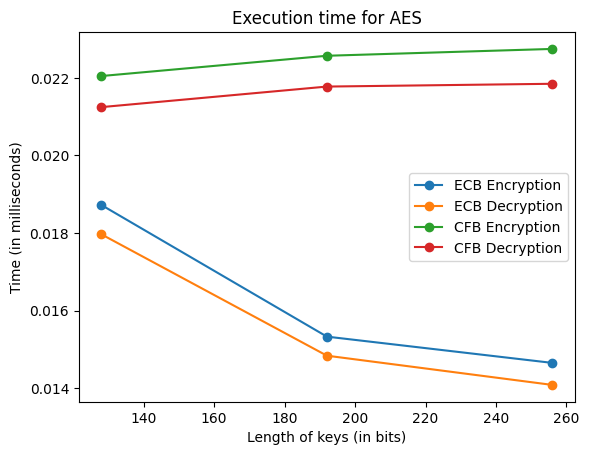

In [ ]:
from Crypto.Cipher import AES
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import Padding
import os

def AesEncrypt(plaintext, key, mode, iv = None):
    start_time = timer()
    plaintext = Padding.appendPadding(plaintext, blocksize=Padding.AES_blocksize, mode=0)
    if iv == None: cipher = AES.new(key, mode)
    else: cipher = AES.new(key, mode, iv)
    ciphertext = cipher.encrypt(plaintext.encode())

    return ciphertext, timer() - start_time

def AesDecrypt(ciphertext, key, mode, iv = None):
    start_time = timer()
    if iv == None: cipher = AES.new(key, mode)
    else: cipher = AES.new(key, mode, iv)
    plaintext = cipher.decrypt(ciphertext)
    plaintext = Padding.removePadding(plaintext.decode(), mode=0)

    return plaintext, timer() - start_time

x_axis = [128, 192, 256]
aes_ecb_enc = []
aes_ecb_dec = []
aes_cfb_enc = []
aes_cfb_dec = []

plaintext = "We read in Shahjalal University of Science and Technology"

n = 1000000

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    mode = AES.MODE_ECB
    key = os.urandom(16)

    ciphertext, exec_time = AesEncrypt(plaintext, key, mode)
    enc_exec_time += exec_time
    plaintext, exec_time = AesDecrypt(ciphertext, key, mode)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

aes_ecb_enc.append(enc_exec_time)
aes_ecb_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    mode = AES.MODE_ECB
    key = os.urandom(24)

    ciphertext, exec_time = AesEncrypt(plaintext, key, mode)
    enc_exec_time += exec_time
    plaintext, exec_time = AesDecrypt(ciphertext, key, mode)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

aes_ecb_enc.append(enc_exec_time)
aes_ecb_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    mode = AES.MODE_ECB
    key = os.urandom(32)

    ciphertext, exec_time = AesEncrypt(plaintext, key, mode)
    enc_exec_time += exec_time
    plaintext, exec_time = AesDecrypt(ciphertext, key, mode)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

aes_ecb_enc.append(enc_exec_time)
aes_ecb_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    mode = AES.MODE_CFB
    key = os.urandom(16)
    iv = os.urandom(AES.block_size)

    ciphertext, exec_time = AesEncrypt(plaintext, key, mode, iv)
    enc_exec_time += exec_time
    plaintext, exec_time = AesDecrypt(ciphertext, key, mode, iv)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

aes_cfb_enc.append(enc_exec_time)
aes_cfb_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    mode = AES.MODE_CFB
    key = os.urandom(24)
    iv = os.urandom(AES.block_size)

    ciphertext, exec_time = AesEncrypt(plaintext, key, mode, iv)
    enc_exec_time += exec_time
    plaintext, exec_time = AesDecrypt(ciphertext, key, mode, iv)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

aes_cfb_enc.append(enc_exec_time)
aes_cfb_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    mode = AES.MODE_CFB
    key = os.urandom(32)
    iv = os.urandom(AES.block_size)

    ciphertext, exec_time = AesEncrypt(plaintext, key, mode, iv)
    enc_exec_time += exec_time
    plaintext, exec_time = AesDecrypt(ciphertext, key, mode, iv)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

aes_cfb_enc.append(enc_exec_time)
aes_cfb_dec.append(dec_exec_time)

print(aes_ecb_enc, aes_ecb_dec, aes_cfb_enc, aes_cfb_dec)

for x in range(3): aes_ecb_enc[x] *= 1000
for x in range(3): aes_ecb_dec[x] *= 1000
for x in range(3): aes_cfb_enc[x] *= 1000
for x in range(3): aes_cfb_dec[x] *= 1000

plt.plot(x_axis, aes_ecb_enc, label = "ECB Encryption", marker='o')
plt.plot(x_axis, aes_ecb_dec, label = "ECB Decryption", marker='o')
plt.plot(x_axis, aes_cfb_enc, label = "CFB Encryption", marker='o')
plt.plot(x_axis, aes_cfb_dec, label = "CFB Decryption", marker='o')

plt.xlabel('Length of keys (in bits)')
plt.ylabel('Time (in milliseconds)')

plt.title('Execution time for AES')

plt.legend()
plt.savefig('aes_execution_time_1000000.pdf', dpi = 1000)

## Comparing the execution times for different key lengths of RSA

[0.0005132074399989506, 0.000896221770003649, 0.0017235961900064468] [0.0007550939199938967, 0.0021845680699971127, 0.010278614029999744]


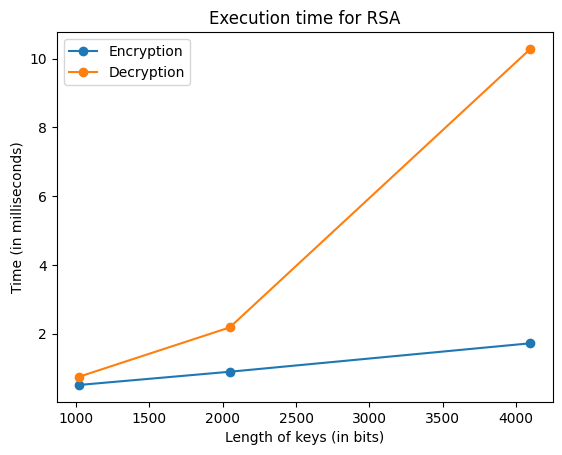

In [ ]:
from Crypto.Cipher import PKCS1_OAEP
from Crypto.PublicKey import RSA
from Crypto.Signature.pkcs1_15 import PKCS115_SigScheme
import matplotlib.pyplot as plt
from timeit import default_timer as timer

def RsaEncrypt(plaintext, public_key):
    start_time = timer()
    cipher = PKCS1_OAEP.new(public_key)
    ciphertext = cipher.encrypt(plaintext.encode())

    return ciphertext, timer() - start_time

def RsaDecrypt(ciphertext, private_key):
    start_time = timer()
    cipher = PKCS1_OAEP.new(private_key)
    plaintext = cipher.decrypt(ciphertext)
    plaintext = plaintext.decode()

    return plaintext, timer() - start_time

x_axis = [1024, 2048, 4096]
rsa_enc = []
rsa_dec = []

plaintext = "We read in Shahjalal University of Science and Technology"

n = 100

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    key = RSA.generate(1024)
    public_key = key.publickey()

    ciphertext, exec_time = RsaEncrypt(plaintext, public_key)
    enc_exec_time += exec_time
    plaintext, exec_time = RsaDecrypt(ciphertext, key)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

rsa_enc.append(enc_exec_time)
rsa_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    key = RSA.generate(2048)
    public_key = key.publickey()

    ciphertext, exec_time = RsaEncrypt(plaintext, public_key)
    enc_exec_time += exec_time
    plaintext, exec_time = RsaDecrypt(ciphertext, key)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

rsa_enc.append(enc_exec_time)
rsa_dec.append(dec_exec_time)

enc_exec_time = 0.0
dec_exec_time = 0.0

for x in range(n):
    key = RSA.generate(4096)
    public_key = key.publickey()

    ciphertext, exec_time = RsaEncrypt(plaintext, public_key)
    enc_exec_time += exec_time
    plaintext, exec_time = RsaDecrypt(ciphertext, key)
    dec_exec_time += exec_time

enc_exec_time /= n
dec_exec_time /= n

rsa_enc.append(enc_exec_time)
rsa_dec.append(dec_exec_time)

print(rsa_enc, rsa_dec)

for x in range(3): rsa_enc[x] *= 1000
for x in range(3): rsa_dec[x] *= 1000

plt.plot(x_axis, rsa_enc, label = "Encryption", marker='o')
plt.plot(x_axis, rsa_dec, label = "Decryption", marker='o')

plt.xlabel('Length of keys (in bits)')
plt.ylabel('Time (in milliseconds)')

plt.title('Execution time for RSA')

plt.legend()
plt.savefig('rsa_execution_time_100.pdf', dpi = 1000)